## Studying sample 17NR2125

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from matplotlib.ticker import ScalarFormatter
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')

In [3]:
# Read coverage per base file and add column names to the file
header = ["chr", "start", "end", "feature", "base", "17NR2122", "17NR2123", 
          "17NR2124", "17NR2125", "17NR2126", "17NR2127", "17NR2128", "17NR2129", 
          "17NR2130", "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
          "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", "17NR2141", 
          "17NR2142", "17NR2143", "17NR2144", "17NR2145", "17NR2146", "17NR2147", 
          "17NR2148", "17NR2149", "17NR2150", "17NR2151", "17NR2152", "17NR2153", 
          "17NR2154"]
df = pd.read_csv("./pasted_coverages-chr15-2.tsv", sep="\t", names=header, index_col=False)
df.head()

,chr,start,end,feature,base,17NR2122,17NR2123,17NR2124,17NR2125,17NR2126,...,17NR2145,17NR2146,17NR2147,17NR2148,17NR2149,17NR2150,17NR2151,17NR2152,17NR2153,17NR2154
0,15,25578147,25685147,UBE3A,1,106,60,109,94,79,...,142,131,142,114,99,129,171,142,125,125
1,15,25578147,25685147,UBE3A,2,106,61,114,95,79,...,143,135,146,114,101,131,176,144,128,129
2,15,25578147,25685147,UBE3A,3,108,61,118,96,80,...,145,139,147,117,106,134,183,147,130,134
3,15,25578147,25685147,UBE3A,4,109,62,120,98,83,...,146,144,149,121,110,134,185,149,130,136
4,15,25578147,25685147,UBE3A,5,111,64,123,99,84,...,150,148,156,123,111,138,186,151,131,136


In [4]:
dic_total_reads = {"17NR2122":6794137, "17NR2123":3870331, "17NR2124":8761807, "17NR2125":7956425, 
                "17NR2126":4976172, "17NR2127":2399678, "17NR2128":5845975, "17NR2129":7520553, "17NR2130":7544035, 
                "17NR2131":8224731, "17NR2132":6843457, "17NR2133":6604556, "17NR2134":7510350, "17NR2135":7016579, 
                "17NR2136":8359478, "17NR2137":7663546, "17NR2138":9244365, "17NR2139":7487638, "17NR2140":8640616, 
                "17NR2141":7406296, "17NR2142":5602032, "17NR2143":7164379, "17NR2144":7068970, "17NR2145":9307389,
                "17NR2146":7300131, "17NR2147":7013634, "17NR2148":7278219, 
                   "17NR2149":6378808, "17NR2150":8210828, "17NR2151":8707031, 
                   "17NR2152":7102156, "17NR2153":8520552, "17NR2154":7290042}

list_samples = ["17NR2122", "17NR2123", "17NR2124", "17NR2125", 
                "17NR2126", "17NR2127", "17NR2128", "17NR2129", "17NR2130", 
                "17NR2131", "17NR2132", "17NR2133", "17NR2134", "17NR2135", 
                "17NR2136", "17NR2137", "17NR2138", "17NR2139", "17NR2140", 
                "17NR2141", "17NR2142", "17NR2143", "17NR2144", "17NR2145", 
                "17NR2146", "17NR2147", "17NR2148", "17NR2149", "17NR2150", 
                "17NR2151", "17NR2152", "17NR2153", "17NR2154"]
dff = df.copy()

In [5]:
# Normalize using total number of reads for each sample
for elem in list_samples:
    dff[elem] = (dff[elem]/dic_total_reads[elem])*10**5

# Calculate mean coverage 
dff["mean"] = dff.loc[:, list_samples].mean(axis=1)
list_samples = list_samples + ["mean"]

dff.shape

(107000, 39)

In [6]:
# Do not take into account positions with coverage = 0, they correspond to repetitive sequences
da = dff.loc[dff['base'] > 68841][dff['base'] < 95594][dff["mean"] != 0.0].reset_index(drop=True)
da.shape

/home/ugdg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/ugdg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(17164, 39)

In [7]:
# Create column with the ratio between the sample and mean of samples
da["division"] = da["17NR2151"]/da["mean"]

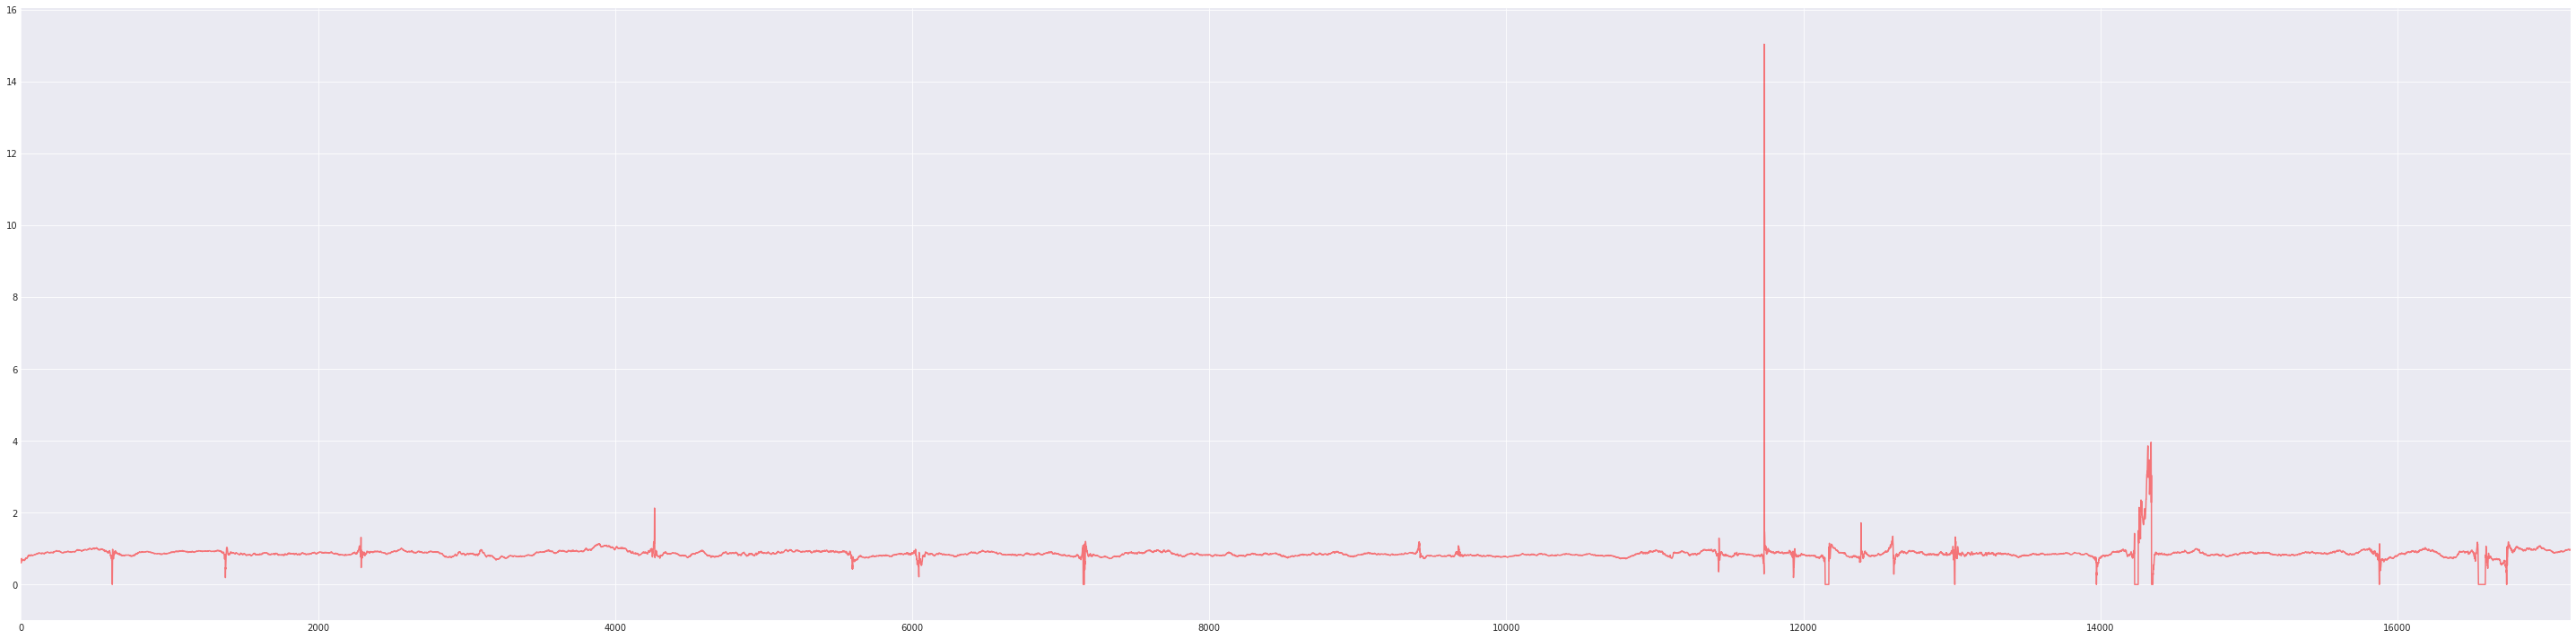

In [8]:
# Plot the ratio, it is mostly 0.5, this means it is a 1x deletion
da["index"] = da.index

fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)

ax1.set_ylim(-1, da["division"].max() + 1)
ax1.set_xlim(da["index"].min(), da["index"].max())

ax1.plot(da["index"], da["division"], alpha = 0.5, color = "red")

fig.tight_layout()
plt.show()
plt.close(fig)

In [9]:
# Check mean of change ratio between normal samples and the sample of interest
da["division"].mean()

0.8586441799648841

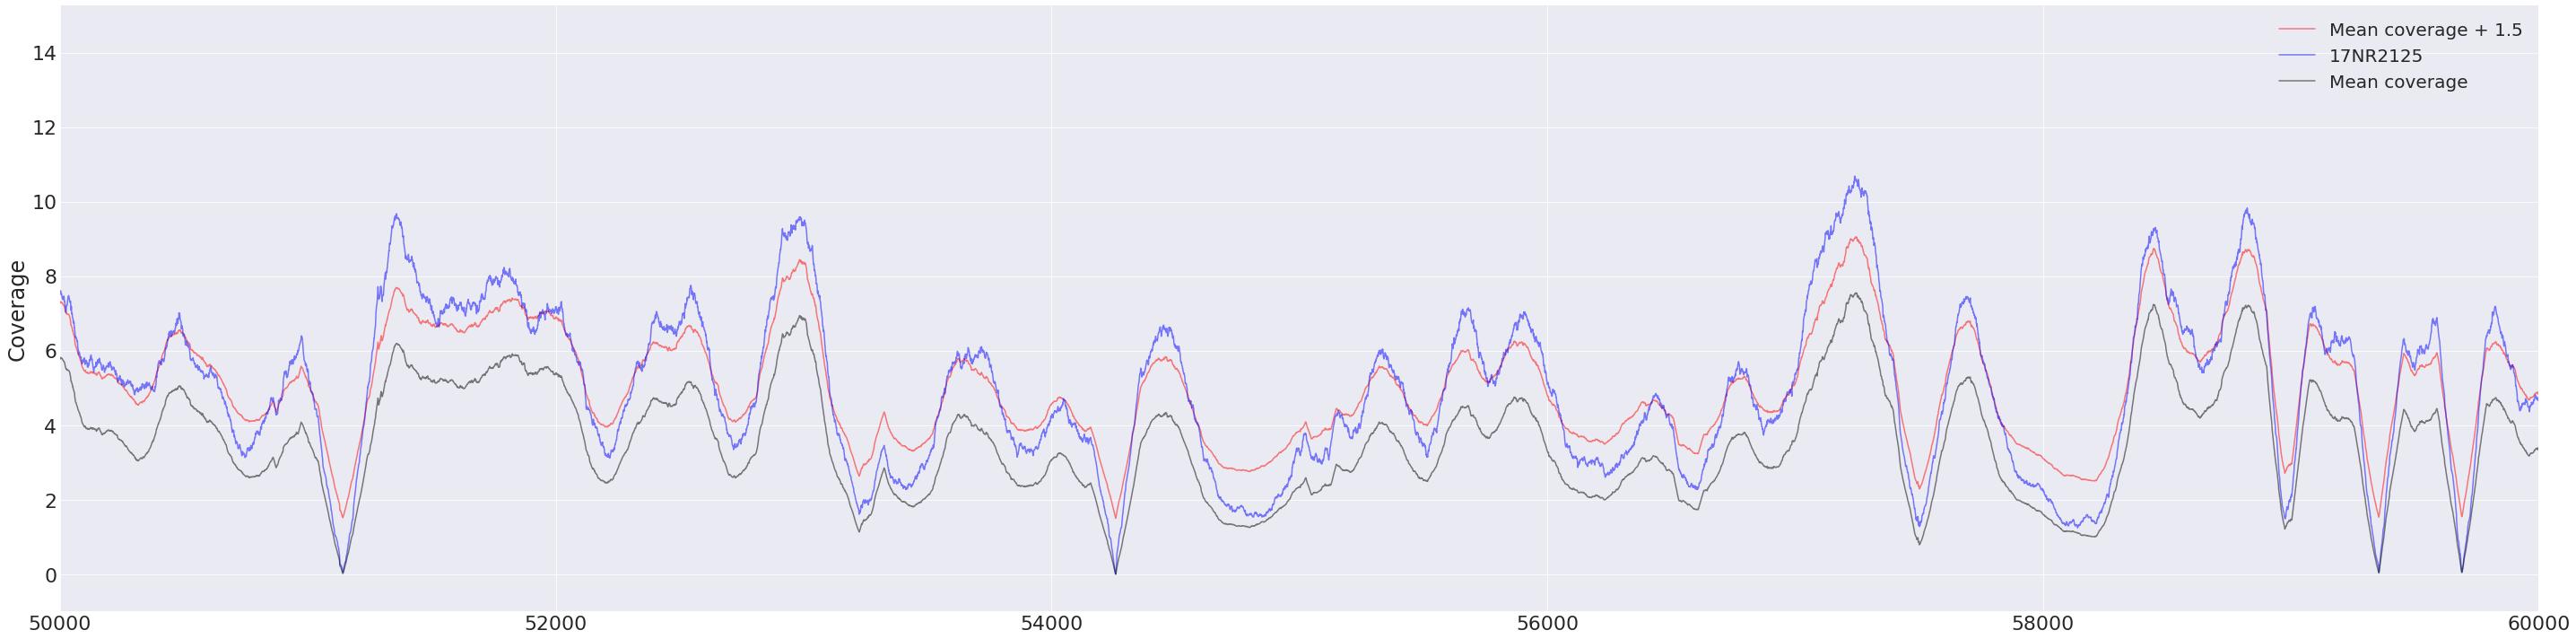

In [28]:
# Plot mean coverage, our sample of interest and the expected ratio of 0.5 for deletions of 1x
da["index"] = da.index

fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111)

ax1.set_ylim(-1, da["mean"].max() + 1)
#ax1.set_xlim(da["index"].min(), da["index"].max())
ax1.set_xlim(50000, 60000)

ax1.plot(da["index"], 1.5 + da["mean"], alpha = 0.5, color = "red")
ax1.plot(da["index"], da["17NR2125"], alpha = 0.5, color = "blue")
ax1.plot(da["index"], da["mean"], alpha = 0.5, color = 'black')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

ax1.set_ylabel('Coverage', fontsize=24)

ax1.legend(fontsize = 20, labels=["Mean coverage + 1.5", "17NR2125", "Mean coverage"])

fig.tight_layout()
plt.show()
plt.close(fig)